## 时机最重要

In [41]:
import flynnBot.flynnBot as fbot
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
sym = '000333'

start = '2011-01-01'
end = '2020-12-31'

bot = fbot.flynnBot(sym, 1000000, 0, start, end)
df = bot.fetch()
df.head(5)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,date_str,ema_48,ema_14
0,2013-09-18,42.24,46.40,39.88,40.50,38890,8.120124,8.919833,7.666442,7.785630,38890,0.0,1.0,2013-09-18,8.120124,8.120124
1,2013-09-19,42.24,42.24,42.24,42.24,0,8.120124,8.120124,8.120124,8.120124,0,0.0,1.0,2013-09-19,8.120124,8.120124
2,2013-09-20,42.24,42.24,42.24,42.24,0,8.120124,8.120124,8.120124,8.120124,0,0.0,1.0,2013-09-20,8.120124,8.120124
3,2013-09-23,46.20,46.46,40.67,41.90,31852,8.881385,8.931367,7.818310,8.054763,31852,0.0,1.0,2013-09-23,8.337140,8.436340
4,2013-09-24,44.61,46.15,44.40,45.49,20005,8.575727,8.871773,8.535357,8.744896,20005,0.0,1.0,2013-09-24,8.393909,8.489849


## 格式化

In [43]:
dataSet = df.set_index(pd.to_datetime(df['date'])).copy()
dataSet.head(2)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,date_str,ema_48,ema_14
date,,,,,,,,,,,,,,,,
2013-09-18,2013-09-18,42.24,46.40,39.88,40.50,38890,8.120124,8.919833,7.666442,7.785630,38890,0.0,1.0,2013-09-18,8.120124,8.120124
2013-09-19,2013-09-19,42.24,42.24,42.24,42.24,0,8.120124,8.120124,8.120124,8.120124,0,0.0,1.0,2013-09-19,8.120124,8.120124


# 按照每年pivot分段

In [49]:
ptbl = pd.pivot_table(dataSet, index=dataSet.index.month,
                     columns=dataSet.index.year,
                     values='adjClose',
                     aggfunc='sum')
ptbl

date,2013,2014,2015,2016,2017,2018,2019,2020
date,,,,,,,,
1,NaN,210.233152,345.057967,323.236201,550.291634,1239.830099,856.836374,1269.016078
2,NaN,171.406889,312.143772,309.679189,535.113543,1021.789478,854.429217,1024.709232
3,NaN,166.939283,350.193154,367.476854,662.272976,1149.914006,932.480587,1077.638566
4,NaN,196.860642,393.711637,347.012120,575.368106,989.267795,1078.108940,1054.112298
5,NaN,191.456688,409.563892,400.929010,728.968102,1125.484178,1085.148224,1139.841028
6,NaN,195.754726,441.378182,432.764450,810.852755,1058.898154,972.896108,1277.837856
7,NaN,230.067571,428.386494,477.972496,800.923649,967.351835,1183.296888,1478.933247
8,NaN,231.843957,350.188703,545.209377,846.481257,918.130585,1082.198808,1453.403476
9,75.322605,238.306329,315.520872,499.460483,802.059182,752.956860,1062.803470,1498.984652


In [50]:
# 丢掉不全的年
ptbl.dropna(axis=1, inplace=True)
ptbl

date,2014,2015,2016,2017,2018,2019,2020
date,,,,,,,
1,210.233152,345.057967,323.236201,550.291634,1239.830099,856.836374,1269.016078
2,171.406889,312.143772,309.679189,535.113543,1021.789478,854.429217,1024.709232
3,166.939283,350.193154,367.476854,662.272976,1149.914006,932.480587,1077.638566
4,196.860642,393.711637,347.012120,575.368106,989.267795,1078.108940,1054.112298
5,191.456688,409.563892,400.929010,728.968102,1125.484178,1085.148224,1139.841028
6,195.754726,441.378182,432.764450,810.852755,1058.898154,972.896108,1277.837856
7,230.067571,428.386494,477.972496,800.923649,967.351835,1183.296888,1478.933247
8,231.843957,350.188703,545.209377,846.481257,918.130585,1082.198808,1453.403476
9,238.306329,315.520872,499.460483,802.059182,752.956860,1062.803470,1498.984652


In [51]:
for c in ptbl.columns:
    average = ptbl[c].sum() / 12
    ptbl['norm' + str(c)] = ptbl[c] / average

ptbl.filter(regex='norm')

date,norm2014,norm2015,norm2016,norm2017,norm2018,norm2019,norm2020
date,,,,,,,
1,0.971452,0.948031,0.738046,0.706298,1.277002,0.815123,0.909241
2,0.792042,0.857601,0.707091,0.686817,1.052424,0.812833,0.734197
3,0.771398,0.962140,0.839061,0.850025,1.184390,0.887085,0.772120
4,0.909660,1.081705,0.792334,0.738483,1.018927,1.025624,0.755264
5,0.884689,1.125258,0.915442,0.935628,1.159228,1.032320,0.816688
6,0.904550,1.212666,0.988132,1.040727,1.090645,0.925533,0.915562
7,1.063104,1.176972,1.091356,1.027983,0.996354,1.125691,1.059645
8,1.071312,0.962127,1.244878,1.086456,0.945657,1.029514,1.041353
9,1.101174,0.866879,1.140419,1.029441,0.775531,1.011063,1.074012


# 再对norm之后的月份进行一个汇总

In [52]:
yearslis = list(ptbl.filter(regex='norm'))
yearslis

['norm2014',
 'norm2015',
 'norm2016',
 'norm2017',
 'norm2018',
 'norm2019',
 'norm2020']

In [53]:
ptbl['sum'] = ptbl[yearslis].sum(axis=1)

In [54]:
ptbl

date,2014,2015,2016,2017,2018,2019,2020,norm2014,norm2015,norm2016,norm2017,norm2018,norm2019,norm2020,sum
date,,,,,,,,,,,,,,,
1,210.233152,345.057967,323.236201,550.291634,1239.830099,856.836374,1269.016078,0.971452,0.948031,0.738046,0.706298,1.277002,0.815123,0.909241,6.365193
2,171.406889,312.143772,309.679189,535.113543,1021.789478,854.429217,1024.709232,0.792042,0.857601,0.707091,0.686817,1.052424,0.812833,0.734197,5.643005
3,166.939283,350.193154,367.476854,662.272976,1149.914006,932.480587,1077.638566,0.771398,0.962140,0.839061,0.850025,1.184390,0.887085,0.772120,6.266219
4,196.860642,393.711637,347.012120,575.368106,989.267795,1078.108940,1054.112298,0.909660,1.081705,0.792334,0.738483,1.018927,1.025624,0.755264,6.321996
5,191.456688,409.563892,400.929010,728.968102,1125.484178,1085.148224,1139.841028,0.884689,1.125258,0.915442,0.935628,1.159228,1.032320,0.816688,6.869254
6,195.754726,441.378182,432.764450,810.852755,1058.898154,972.896108,1277.837856,0.904550,1.212666,0.988132,1.040727,1.090645,0.925533,0.915562,7.077815
7,230.067571,428.386494,477.972496,800.923649,967.351835,1183.296888,1478.933247,1.063104,1.176972,1.091356,1.027983,0.996354,1.125691,1.059645,7.541105
8,231.843957,350.188703,545.209377,846.481257,918.130585,1082.198808,1453.403476,1.071312,0.962127,1.244878,1.086456,0.945657,1.029514,1.041353,7.381298
9,238.306329,315.520872,499.460483,802.059182,752.956860,1062.803470,1498.984652,1.101174,0.866879,1.140419,1.029441,0.775531,1.011063,1.074012,6.998519


In [55]:
nyears = len(yearslis)
ptbl['finalIndex'] = ptbl['sum'] / nyears
ptbl

date,2014,2015,2016,2017,2018,2019,2020,norm2014,norm2015,norm2016,norm2017,norm2018,norm2019,norm2020,sum,finalIndex
date,,,,,,,,,,,,,,,,
1,210.233152,345.057967,323.236201,550.291634,1239.830099,856.836374,1269.016078,0.971452,0.948031,0.738046,0.706298,1.277002,0.815123,0.909241,6.365193,0.909313
2,171.406889,312.143772,309.679189,535.113543,1021.789478,854.429217,1024.709232,0.792042,0.857601,0.707091,0.686817,1.052424,0.812833,0.734197,5.643005,0.806144
3,166.939283,350.193154,367.476854,662.272976,1149.914006,932.480587,1077.638566,0.771398,0.962140,0.839061,0.850025,1.184390,0.887085,0.772120,6.266219,0.895174
4,196.860642,393.711637,347.012120,575.368106,989.267795,1078.108940,1054.112298,0.909660,1.081705,0.792334,0.738483,1.018927,1.025624,0.755264,6.321996,0.903142
5,191.456688,409.563892,400.929010,728.968102,1125.484178,1085.148224,1139.841028,0.884689,1.125258,0.915442,0.935628,1.159228,1.032320,0.816688,6.869254,0.981322
6,195.754726,441.378182,432.764450,810.852755,1058.898154,972.896108,1277.837856,0.904550,1.212666,0.988132,1.040727,1.090645,0.925533,0.915562,7.077815,1.011116
7,230.067571,428.386494,477.972496,800.923649,967.351835,1183.296888,1478.933247,1.063104,1.176972,1.091356,1.027983,0.996354,1.125691,1.059645,7.541105,1.077301
8,231.843957,350.188703,545.209377,846.481257,918.130585,1082.198808,1453.403476,1.071312,0.962127,1.244878,1.086456,0.945657,1.029514,1.041353,7.381298,1.054471
9,238.306329,315.520872,499.460483,802.059182,752.956860,1062.803470,1498.984652,1.101174,0.866879,1.140419,1.029441,0.775531,1.011063,1.074012,6.998519,0.999788


<AxesSubplot:xlabel='date'>

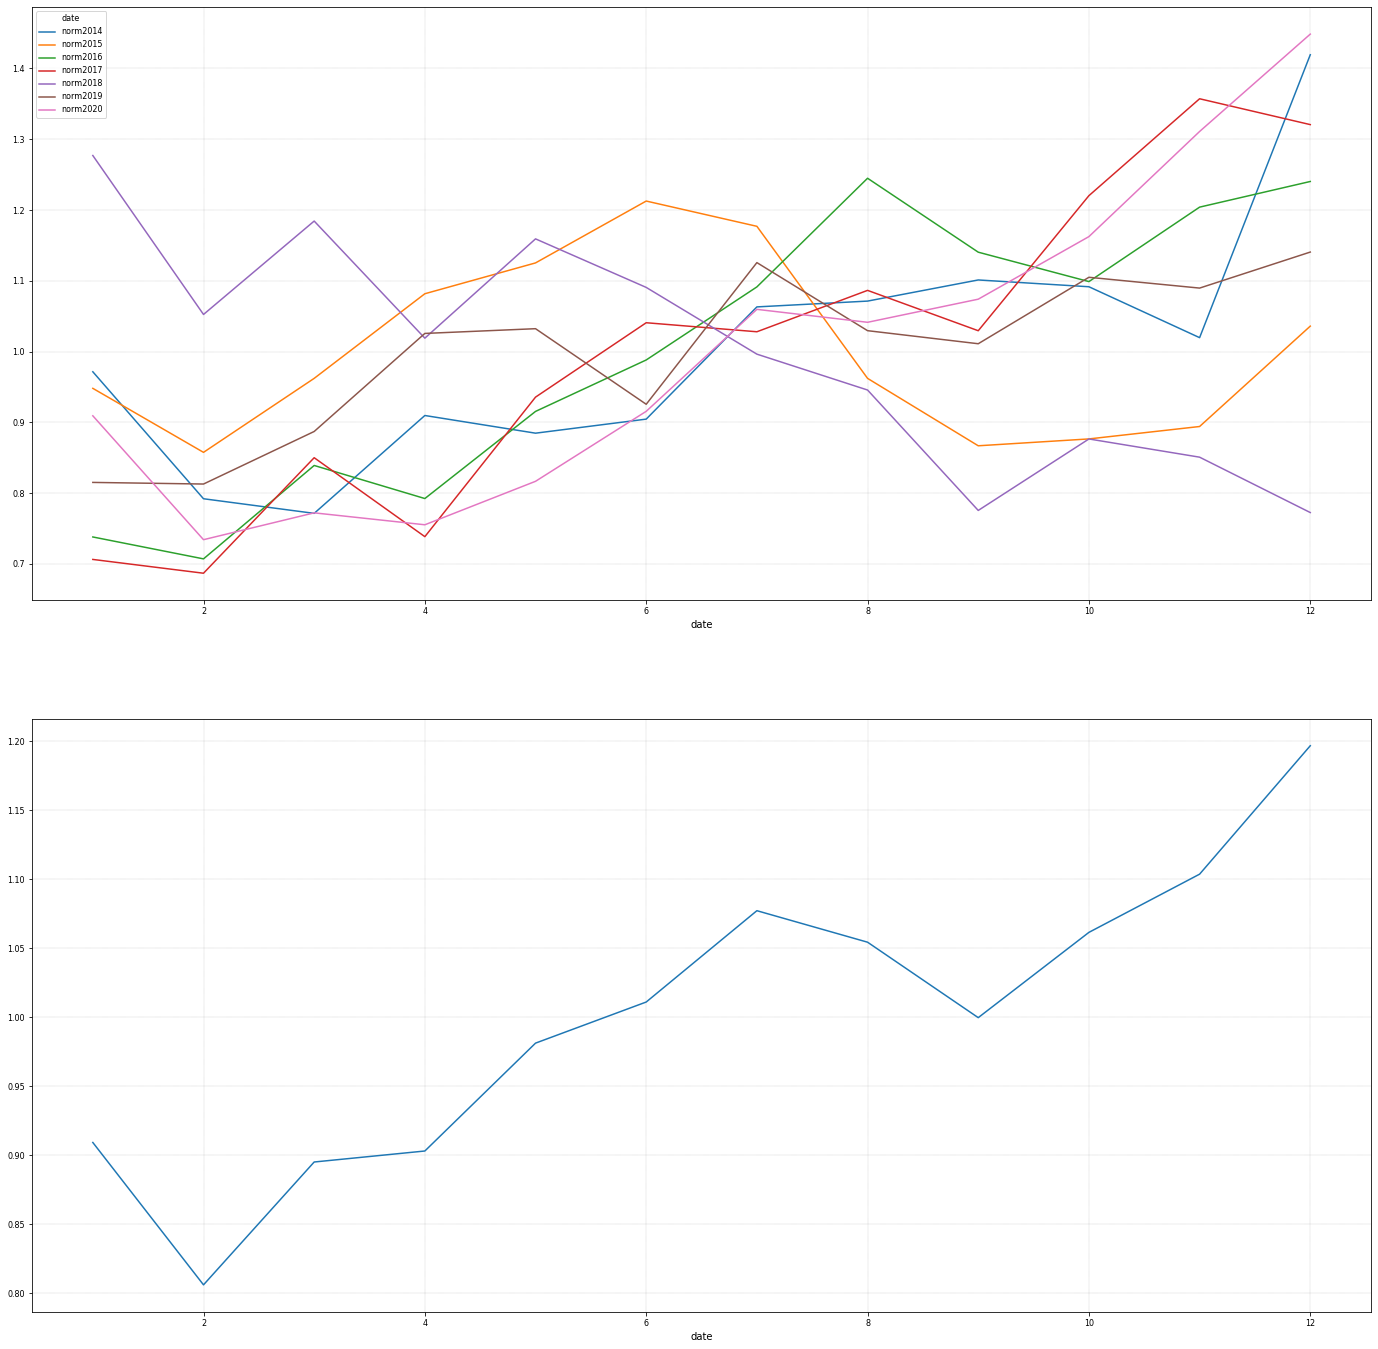

In [56]:
fig, (axup, axdown) = plt.subplots(2, figsize=(24, 24))

ptbl[yearslis].plot(grid=True, ax=axup)
ptbl['finalIndex'].plot(grid=True, ax=axdown)